In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
data = pd.read_csv('Admission_Predict.csv')
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [78]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [79]:
data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [80]:
data.shape

(400, 9)

In [81]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [82]:
data.dtypes

,0
Serial No.,int64
GRE Score,int64
TOEFL Score,int64
University Rating,int64
SOP,float64
LOR,float64
CGPA,float64
Research,int64
Chance of Admit,float64


In [83]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [84]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [85]:
#Remove Serial No.
data= data.drop('Serial No.',axis=1)
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [86]:
data['Admission_Predict'] = [1 if each > 0.75 else 0 for each in data['Chance of Admit ']]

In [87]:
data = data.drop('Chance of Admit ', axis=1)
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission_Predict
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,1
396,325,107,3,3.0,3.5,9.11,1,1
397,330,116,4,5.0,4.5,9.45,1,1
398,312,103,3,3.5,4.0,8.78,0,0


In [88]:
data.isnull().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Admission_Predict,0


<Axes: >

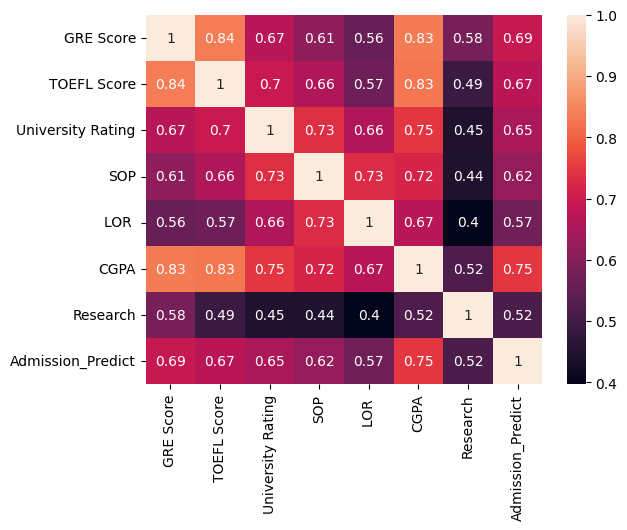

In [89]:
sns.heatmap(data.corr(), annot=True)

In [90]:
x = data.iloc[:,:-1]
y = data['Admission_Predict']

In [91]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)

In [96]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,plot_tree

clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini.fit(x_train,y_train)
clf_gini

DecisionTreeClassifier()

[Text(0.5260922330097088, 0.9545454545454546, 'x[5] <= 8.74\ngini = 0.489\nsamples = 300\nvalue = [172, 128]'),
 Text(0.2657766990291262, 0.8636363636363636, 'x[1] <= 108.5\ngini = 0.193\nsamples = 176\nvalue = [157, 19]'),
 Text(0.3959344660194175, 0.9090909090909092, 'True  '),
 Text(0.14805825242718446, 0.7727272727272727, 'x[4] <= 4.25\ngini = 0.123\nsamples = 152\nvalue = [142, 10]'),
 Text(0.09223300970873786, 0.6818181818181818, 'x[5] <= 8.435\ngini = 0.08\nsamples = 144\nvalue = [138, 6]'),
 Text(0.038834951456310676, 0.5909090909090909, 'x[1] <= 105.5\ngini = 0.018\nsamples = 108\nvalue = [107, 1]'),
 Text(0.019417475728155338, 0.5, 'gini = 0.0\nsamples = 87\nvalue = [87, 0]'),
 Text(0.05825242718446602, 0.5, 'x[6] <= 0.5\ngini = 0.091\nsamples = 21\nvalue = [20, 1]'),
 Text(0.038834951456310676, 0.4090909090909091, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.07766990291262135, 0.4090909090909091, 'x[2] <= 2.5\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.058

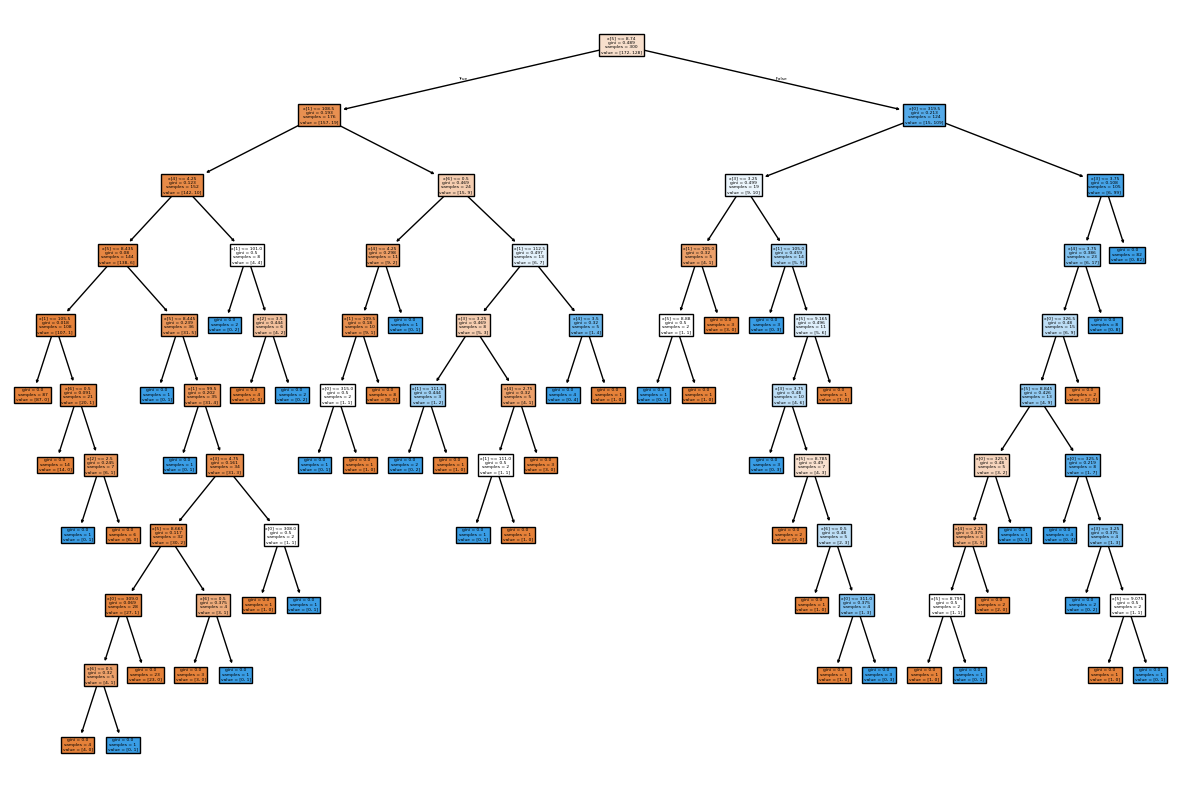

In [98]:
plt.figure(figsize=(15,10))
plot_tree(clf_gini,filled=True)

In [99]:
y_pred_gini = clf_gini.predict(x_test)

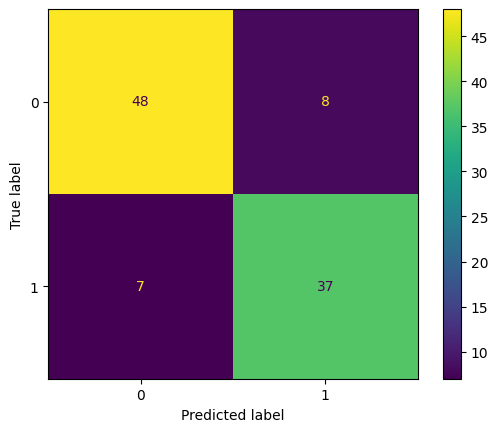

In [101]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,precision_score,recall_score
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_gini)
plt.show()

In [105]:
precision_score(y_test,y_pred_gini)

0.8222222222222222

In [106]:
recall_score(y_test,y_pred_gini)

0.8409090909090909

In [107]:
accuracy_score(y_test,y_pred_gini)

0.85

In [108]:
sample_gini = x.iloc[[17]]
sample_gini_pred = clf_gini.predict(sample_gini)
if(sample_gini_pred == 0):
    print('Student cannot be Admitted')
else:
    print('Student can be Admitted')

Student cannot be Admitted


In [110]:
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.5088141025641025, 0.9666666666666667, 'x[5] <= 8.74\nentropy = 0.984\nsamples = 300\nvalue = [172, 128]'),
 Text(0.20673076923076922, 0.9, 'x[5] <= 8.25\nentropy = 0.494\nsamples = 176\nvalue = [157, 19]'),
 Text(0.3577724358974359, 0.9333333333333333, 'True  '),
 Text(0.09615384615384616, 0.8333333333333334, 'x[1] <= 114.0\nentropy = 0.092\nsamples = 85\nvalue = [84, 1]'),
 Text(0.07051282051282051, 0.7666666666666667, 'entropy = 0.0\nsamples = 84\nvalue = [84, 0]'),
 Text(0.12179487179487179, 0.7666666666666667, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3173076923076923, 0.8333333333333334, 'x[4] <= 4.25\nentropy = 0.718\nsamples = 91\nvalue = [73, 18]'),
 Text(0.17307692307692307, 0.7666666666666667, 'x[1] <= 108.5\nentropy = 0.631\nsamples = 82\nvalue = [69, 13]'),
 Text(0.05128205128205128, 0.7, 'x[4] <= 1.75\nentropy = 0.454\nsamples = 63\nvalue = [57, 6]'),
 Text(0.02564102564102564, 0.6333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.

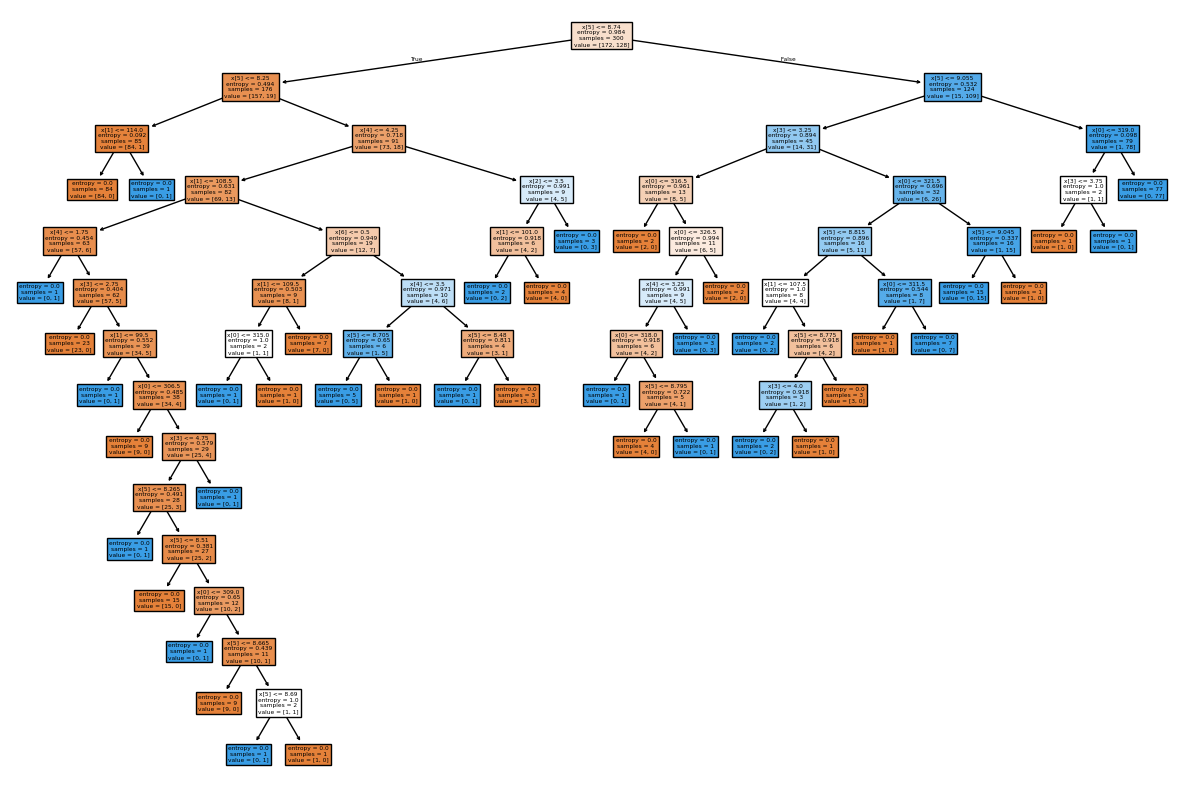

In [111]:
plt.figure(figsize=(15,10))
plot_tree(clf_entropy,filled=True)

In [112]:
y_pred_entropy = clf_entropy.predict(x_test)

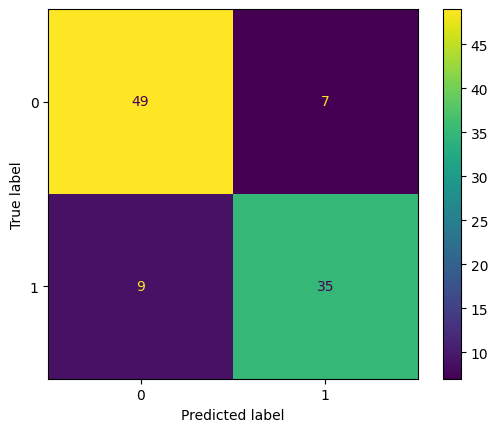

In [113]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_entropy)
plt.show()

In [114]:
precision_score(y_test,y_pred_entropy)

0.8333333333333334

In [115]:
recall_score(y_test,y_pred_entropy)

0.7954545454545454

In [116]:
accuracy_score(y_test,y_pred_entropy)

0.84

In [118]:
sample_entropy = x.iloc[[17]]
sample_entropy_pred = clf_entropy.predict(sample_entropy)
if(sample_entropy_pred == 0):
    print('Student cannot be Admitted')
else:
    print('Student can be Admitted')

Student cannot be Admitted
